In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import seaborn as sns
import time


In [ ]:
names = []
brands = []
prices = []
ratings = []
features_list = []


In [ ]:
for page in range(1, 6):  # scrape 5 pages → change if needed
    url = f"https://www.flipkart.com/search?q=earphones&page={page}"

    headers = {
        "User-Agent":
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
        "(KHTML, like Gecko) Chrome/120.0 Safari/537.36"
    }

    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")

    products = soup.find_all("a", class_="wjcEIp")

    for p in products:
        name = p.get_text(strip=True)
        names.append(name)

        # brand = first word of product name
        brands.append(name.split()[0])

        # price
        price_tag = p.find_next("div", class_="Nx9bqj")
        prices.append(price_tag.text if price_tag else np.nan)

        # rating
        rating_tag = p.find_next("div", class_="XQDdHH")
        ratings.append(rating_tag.text if rating_tag else np.nan)



In [ ]:
features_list = []

headers = {
    "User-Agent":
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

for i, link in enumerate(links):
    try:
        r = requests.get(link, headers=headers, timeout=7)
        soup = BeautifulSoup(r.text, "html.parser")

        features = [li.text.strip() for li in soup.select("li._7eSDEz")]
        features_list.append(", ".join(features) if features else None)

        time.sleep(0.2)  # very small delay to avoid blocking

    except:
        features_list.append(None)


In [ ]:
df = pd.DataFrame({
    "Brand": brands,
    "Product Name": names,
    "Price": prices,
    "Rating": ratings,
    "Features": features_list
})


In [ ]:
df.head()

,Brand,Product Name,Price,Rating,Features
0,Aroma,Aroma NB119 Titanium - 48 Hours Playtime Neckb...,₹289,4,"With Mic:Yes, Bluetooth version: v5.0, Wireles..."
1,Aroma,Aroma NB121 Pods Upto 40 Hours Playtime* Type ...,₹269,3.6,"With Mic:Yes, Bluetooth version: v5.4, Wireles..."
2,myxes,myxes M19 Bluetooth,₹288,3.5,"With Mic:Yes, Bluetooth version: 5.3, Wireless..."
3,boAt,boAt 100 Wired,₹379,4.3,"With Mic:Yes, Connector type: 3.5, Tangle free..."
4,TECHIO,TECHIO Black Earbuds | True Wireless Stereo | ...,₹253,3.6,"With Mic:Yes, Bluetooth version: Bluetooth 5.3..."


In [ ]:
df.isnull().sum()

,0
Brand,0
Product Name,0
Price,0
Rating,0
Features,2


In [ ]:
df["Features"] = df["Features"].fillna("Not Available")


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.to_csv("flipkart_earphones.csv", index=False)


In [ ]:
df = pd.read_csv("flipkart_earphones.csv")
df.head()


,Brand,Product Name,Price,Rating,Features
0,Aroma,Aroma NB119 Titanium - 48 Hours Playtime Neckb...,₹289,4.0,"With Mic:Yes, Bluetooth version: v5.0, Wireles..."
1,Aroma,Aroma NB121 Pods Upto 40 Hours Playtime* Type ...,₹269,3.6,"With Mic:Yes, Bluetooth version: v5.4, Wireles..."
2,myxes,myxes M19 Bluetooth,₹288,3.5,"With Mic:Yes, Bluetooth version: 5.3, Wireless..."
3,boAt,boAt 100 Wired,₹379,4.3,"With Mic:Yes, Connector type: 3.5, Tangle free..."
4,TECHIO,TECHIO Black Earbuds | True Wireless Stereo | ...,₹253,3.6,"With Mic:Yes, Bluetooth version: Bluetooth 5.3..."


In [ ]:
df.shape[1]


5

In [ ]:
df.shape[0]


176

In [ ]:
df.dtypes


,0
Brand,object
Product Name,object
Price,object
Rating,float64
Features,object


In [ ]:
df.isnull().sum()


,0
Brand,0
Product Name,0
Price,0
Rating,0
Features,0


In [ ]:
df["Price"] = df["Price"].str.replace("₹", "", regex=False)
df["Price"] = df["Price"].str.replace(",", "", regex=False)
df["Price"] = df["Price"].astype(float)


In [ ]:
df["Rating"] = df["Rating"].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)


In [ ]:
df["Features"] = df["Features"].astype(str).str.replace("\n", ", ")


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         176 non-null    object 
 1   Product_Name  176 non-null    object 
 2   Price         176 non-null    float64
 3   Rating        176 non-null    float64
 4   Features      176 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.0+ KB


## Univariate Analysis

<Axes: xlabel='Price', ylabel='Count'>

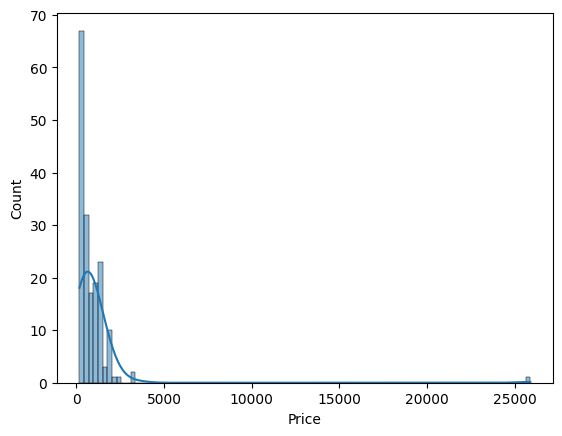

In [ ]:
#Price Distribution
sns.histplot(df["Price"], kde=True)


<Axes: xlabel='Rating', ylabel='Count'>

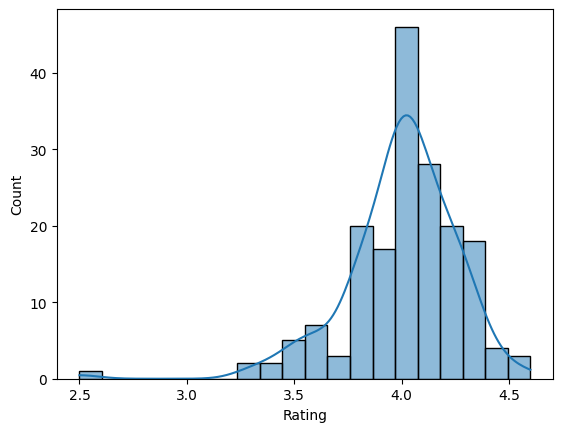

In [ ]:
# Ratings Distribution
sns.histplot(df["Rating"], kde=True)


<Axes: xlabel='Brand'>

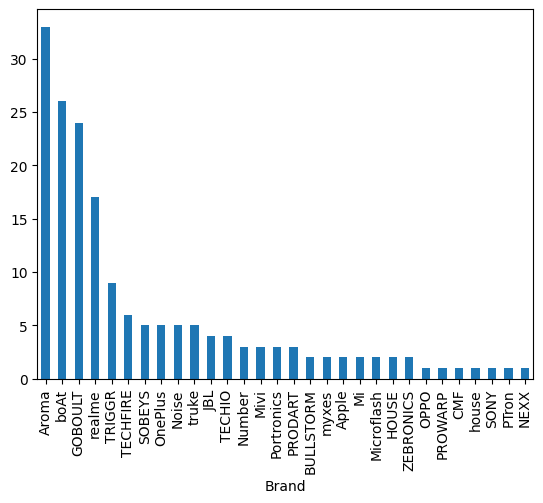

In [ ]:
#Brand Count
df["Brand"].value_counts().plot(kind="bar")


## Bivariate Analysis

In [ ]:
#Brand vs Average Price
df.groupby("Brand")["Price"].mean().sort_values()


,Price
Brand,
PROWARP,177.000000
PRODART,179.000000
TECHFIRE,265.000000
Microflash,267.000000
TECHIO,267.000000
SOBEYS,288.000000
NEXX,290.000000
myxes,293.500000
HOUSE,294.500000


<Axes: xlabel='Rating', ylabel='Price'>

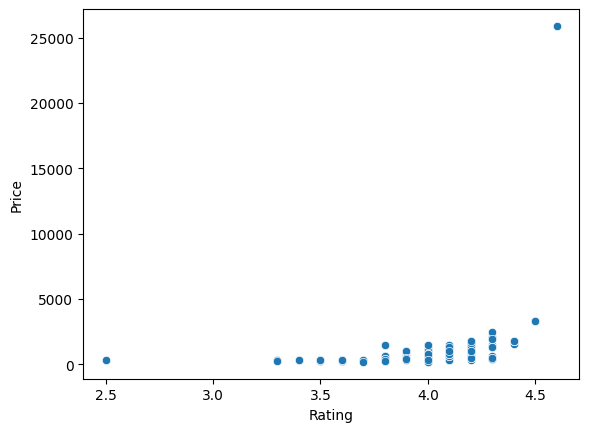

In [ ]:
#Rating vs Price
sns.scatterplot(data=df, x="Rating", y="Price")


In [ ]:
#Brand vs Ratings
df.groupby("Brand")["Rating"].mean().sort_values()


,Rating
Brand,
HOUSE,3.000000
BULLSTORM,3.350000
TECHIO,3.475000
NEXX,3.600000
myxes,3.600000
TECHFIRE,3.733333
Number,3.800000
Microflash,3.850000
Aroma,3.851515
